In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
# 📥 Load Data
df = pd.read_csv("renewable-share-energy.csv")

Step 1: Initial Inspection

In [3]:
print(" HEAD:\n", df.head(), "\n")
print(" TAIL:\n", df.tail(), "\n")
print(" Shape:", df.shape)
print(" Columns:", df.columns.tolist())

 HEAD:
    Entity Code  Year  Renewables (% equivalent primary energy)
0  Africa  NaN  1965                                  5.747495
1  Africa  NaN  1966                                  6.122062
2  Africa  NaN  1967                                  6.325731
3  Africa  NaN  1968                                  7.005293
4  Africa  NaN  1969                                  7.956088 

 TAIL:
      Entity      Code  Year  Renewables (% equivalent primary energy)
5598  World  OWID_WRL  2017                                 11.355979
5599  World  OWID_WRL  2018                                 11.741059
5600  World  OWID_WRL  2019                                 12.237987
5601  World  OWID_WRL  2020                                 13.455194
5602  World  OWID_WRL  2021                                 13.470907 

 Shape: (5603, 4)
 Columns: ['Entity', 'Code', 'Year', 'Renewables (% equivalent primary energy)']


Step 2: Data Cleaning

In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [5]:
# Drop rows with missing values in key columns
df.dropna(subset=['Renewables (% equivalent primary energy)', 'Entity', 'Year'], inplace=True)


In [6]:
# Reset index
df.reset_index(drop=True, inplace=True)

Step 3: Basic Stats

In [7]:
print("\n Data Types:\n", df.dtypes)
print("\n Missing Values:\n", df.isnull().sum())
print("\n Summary:\n", df.describe())



 Data Types:
 Entity                                       object
Code                                         object
Year                                          int64
Renewables (% equivalent primary energy)    float64
dtype: object

 Missing Values:
 Entity                                         0
Code                                        1311
Year                                           0
Renewables (% equivalent primary energy)       0
dtype: int64

 Summary:
               Year  Renewables (% equivalent primary energy)
count  5603.000000                               5603.000000
mean   1993.800821                                 10.735585
std      16.283556                                 12.923945
min    1965.000000                                  0.000000
25%    1980.000000                                  1.980135
50%    1994.000000                                  6.522184
75%    2008.000000                                 14.099622
max    2021.000000                 

Step 4: Latest Year Data Per Entity

In [8]:
df_latest = df.sort_values("Year").groupby("Entity").tail(1).reset_index(drop=True)

Step 5: KMeans Clustering

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


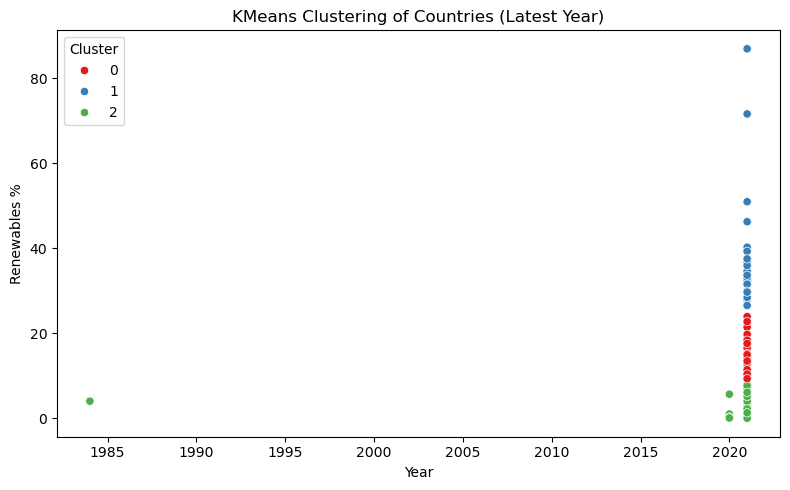

In [12]:
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_latest[['Renewables (% equivalent primary energy)']])

kmeans = KMeans(n_clusters=3, random_state=42)
df_latest["Cluster"] = kmeans.fit_predict(X_cluster)

# 📊 Cluster Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_latest,
    x="Year",
    y="Renewables (% equivalent primary energy)",
    hue="Cluster",
    palette="Set1"
)
plt.title("KMeans Clustering of Countries (Latest Year)")
plt.xlabel("Year")
plt.ylabel("Renewables %")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

Step 6: Decision Tree Classification

In [14]:
#Label: High = 1 if above median, else Low = 0
median_val = df_latest['Renewables (% equivalent primary energy)'].median()
df_latest['Label'] = (df_latest['Renewables (% equivalent primary energy)'] > median_val).astype(int)


In [15]:
# Prepare input/output
X_cls = df_latest[['Year']]
y_cls = df_latest['Label']

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

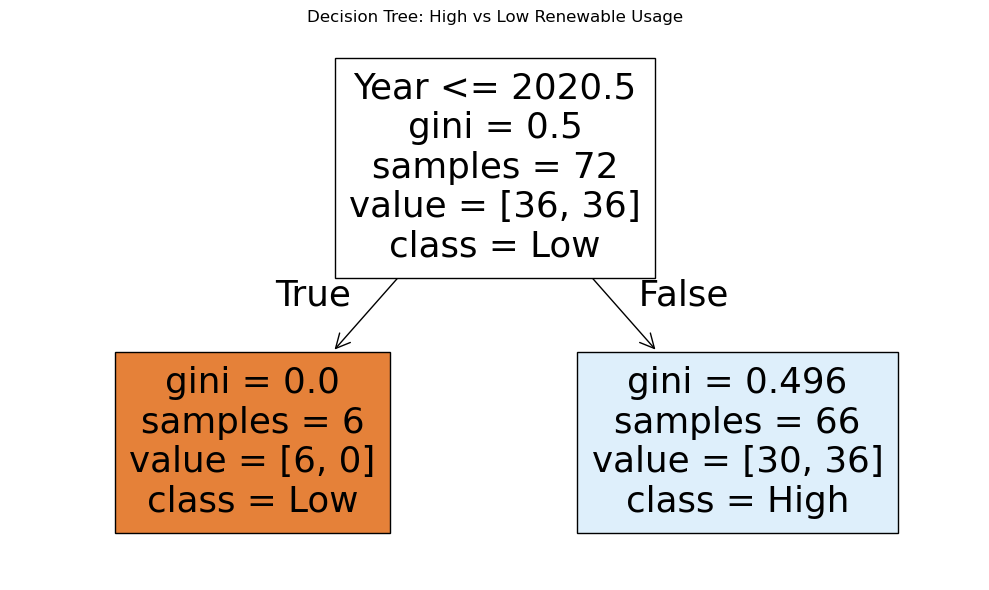

In [16]:
# 🌳 Plot Tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=["Year"], class_names=["Low", "High"], filled=True)
plt.title("Decision Tree: High vs Low Renewable Usage")
plt.tight_layout()
plt.show()

In [17]:
# Evaluation
y_pred = clf.predict(X_test)
print("\n Classification Report:\n", classification_report(y_test, y_pred))



 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22        16
           1       0.53      1.00      0.70        16

    accuracy                           0.56        32
   macro avg       0.77      0.56      0.46        32
weighted avg       0.77      0.56      0.46        32



Step 7: PCA for Visualization

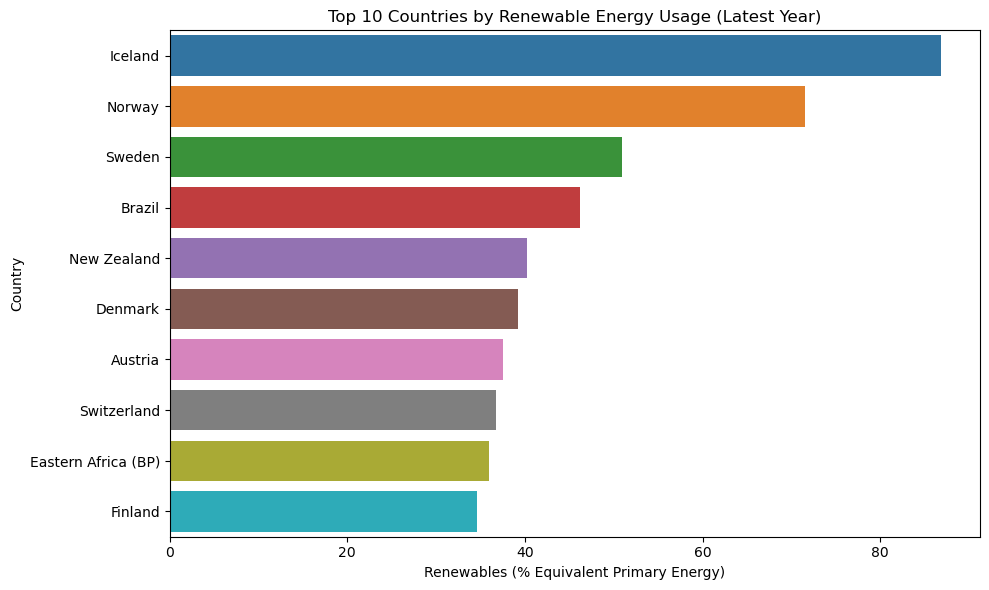

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 countries by renewables
top10 = df_latest.sort_values("Renewables (% equivalent primary energy)", ascending=False).head(10)

# Plot bar chart safely
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10,
    x="Renewables (% equivalent primary energy)",
    y="Entity",
    hue="Entity",  # assign hue for color differentiation
    dodge=False,   # don't separate bars
    legend=False   # remove legend since it's redundant
)
plt.title("Top 10 Countries by Renewable Energy Usage (Latest Year)")
plt.xlabel("Renewables (% Equivalent Primary Energy)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



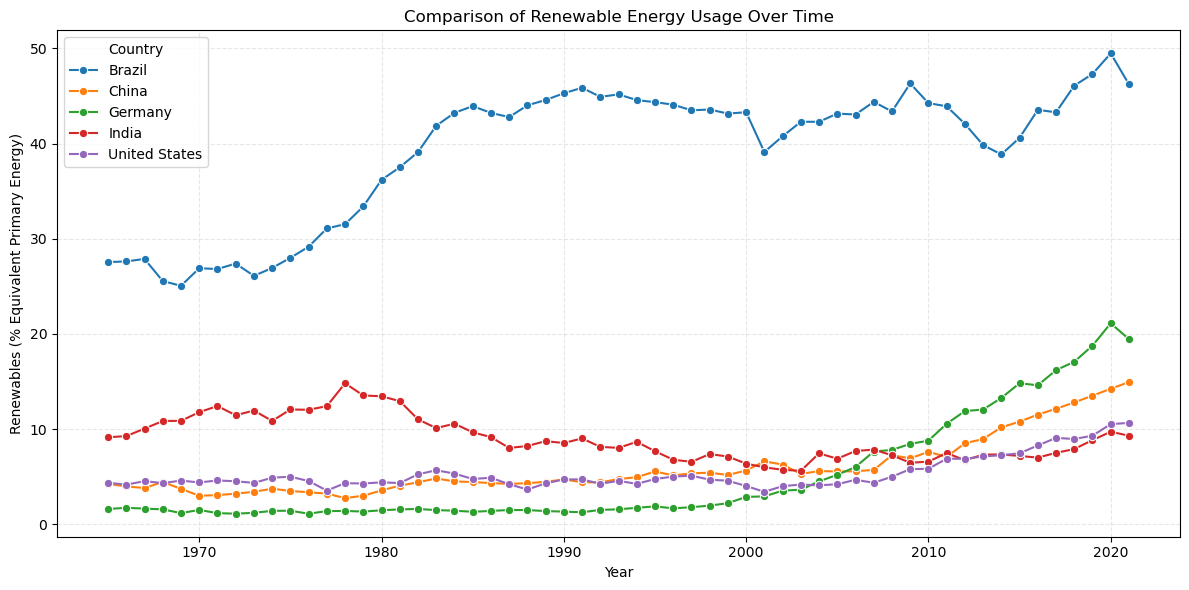

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Choose a few countries to compare
selected_countries = ["Germany", "India", "China", "United States", "Brazil"]

# ✅ Filter data
df_compare = df[df["Entity"].isin(selected_countries)]

# ✅ Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_compare,
    x="Year",
    y="Renewables (% equivalent primary energy)",
    hue="Entity",
    marker="o"
)

plt.title("Comparison of Renewable Energy Usage Over Time")
plt.xlabel("Year")
plt.ylabel("Renewables (% Equivalent Primary Energy)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Country")
plt.tight_layout()
plt.show()


In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

# 🔸 Step 1: Simulate a matrix with missing values
np.random.seed(42)
data = np.random.rand(100, 10)
data[data < 0.1] = np.nan  # Add some NaNs randomly

# 🔸 Step 2: Fill missing values (simple mean imputation)
df = pd.DataFrame(data)
df_filled = df.fillna(df.mean())

# 🔸 Step 3: Convert to NumPy matrix
matrix = df_filled.values

# 🔸 Step 4: Define Autoencoder
input_dim = matrix.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim)
])

# 🔸 Step 5: Compile and train
model.compile(optimizer='adam', loss='mse')
model.fit(matrix, matrix, epochs=20, batch_size=16, verbose=0)

# 🔸 Step 6: Predict missing values (matrix reconstruction)
reconstructed_matrix = model.predict(matrix)

# ✅ FIX: Replace NaNs in original NumPy matrix
final_matrix = data.copy()  # this still has NaNs
final_matrix[np.isnan(final_matrix)] = reconstructed_matrix[np.isnan(final_matrix)]

# ✅ Optional: Convert back to DataFrame
final_df = pd.DataFrame(final_matrix, columns=df.columns)

# Show result
print(final_df.head())


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
          0         1         2         3         4         5         6  \
0  0.374540  0.950714  0.731994  0.598658  0.156019  0.155995  0.464069   
1  0.443626  0.969910  0.832443  0.212339  0.181825  0.183405  0.304242   
2  0.611853  0.139494  0.292145  0.366362  0.456070  0.785176  0.199674   
3  0.607545  0.170524  0.525268  0.948886  0.965632  0.808397  0.304614   
4  0.122038  0.495177  0.516232  0.909320  0.258780  0.662522  0.311711   

          7         8         9  
0  0.866176  0.601115  0.708073  
1  0.524756  0.431945  0.291229  
2  0.514234  0.592415  0.479672  
3  0.530487  0.684233  0.440152  
4  0.520068  0.546710  0.184854  


Epoch 1/30


C:\Users\rahish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 229.3703 - mae: 9.4336 - val_loss: 78.1283 - val_mae: 6.5343
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 86.5957 - mae: 6.2714 - val_loss: 16.9859 - val_mae: 2.7962
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18.8550 - mae: 2.6847 - val_loss: 9.4434 - val_mae: 1.9713
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10.7525 - mae: 2.0280 - val_loss: 7.3861 - val_mae: 1.6417
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.3446 - mae: 1.7268 - val_loss: 6.8503 - val_mae: 1.5693
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.2146 - mae: 1.6125 - val_loss: 5.9911 - val_mae: 1.4282
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.5780 - mae: 1.4791 - val_loss: 5.1344 - val_mae: 1.3335
Epoch 8/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.3075 - mae: 1.3554 - val_loss: 4.7851 - val_mae: 1.3198
Epoch 9/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 

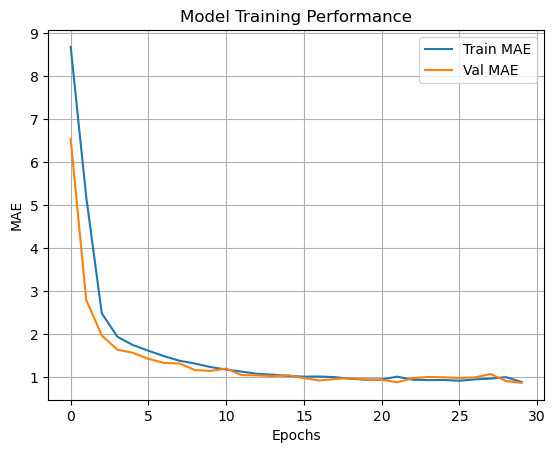

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


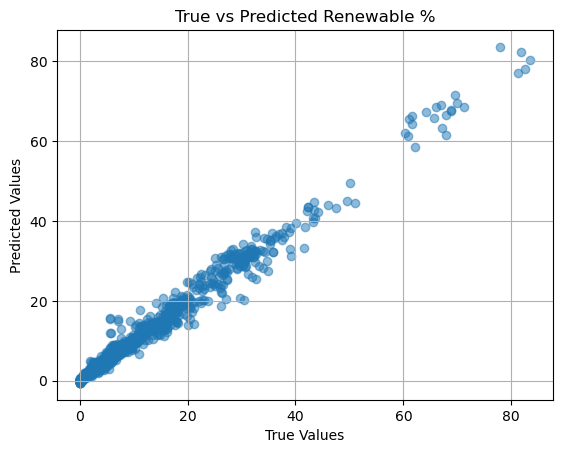

In [31]:
#  Import packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

#  Load your dataset
df = pd.read_csv("renewable-share-energy.csv")

#  Target and features
X = df[['Entity', 'Year']]
y = df['Renewables (% equivalent primary energy)'].values

#  Encode 'Entity' and normalize 'Year'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_entity = encoder.fit_transform(X[['Entity']])

scaler = StandardScaler()
X_year = scaler.fit_transform(X[['Year']])

# Combine encoded + scaled features
X_combined = np.hstack([X_entity, X_year])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

#  Build TensorFlow regression model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_combined.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output: Renewable % (continuous)
])

#  Compile and train
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=32)

# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

# Plot training history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("Model Training Performance")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Compare true vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("True vs Predicted Renewable %")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()
